Amirhossein Mirzade, 96222082, series 1, LIF model

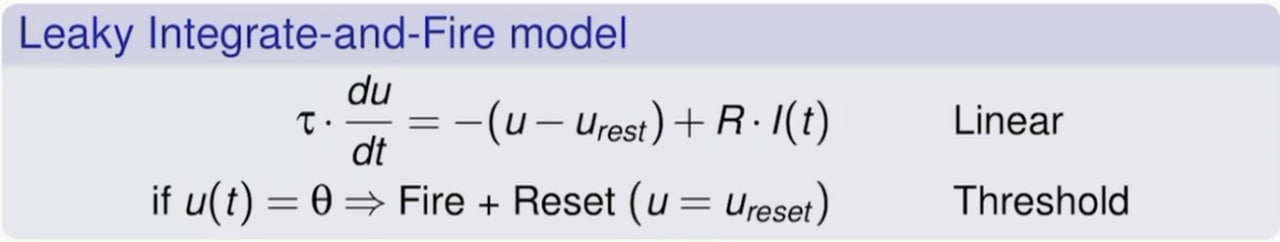

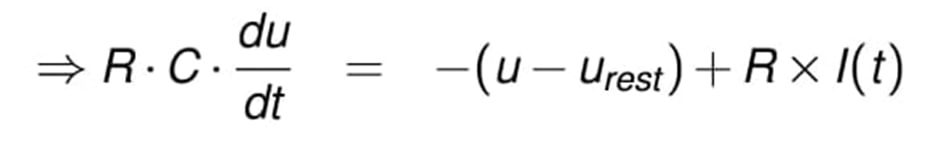

In [1]:
import numpy as np
from matplotlib.pyplot import *
import random
import math

In [2]:
# our current functions are: 
# I_Interval: steady flow in a duration
# I_Linear: a linear current function
# I_Sine: Sine current function
# I_constant: Constant current
# I_step: step by step fixed current

def I_Interval(time, i = 5, duration = (20, 80)):
    start, end = duration
    if start < time < end:
        return i
    return 0


def I_Linear(time, c = 2):
    return c * time


def I_Sine(time, c = 10):
    return c * (0.9 + math.sin(time))


def I_Constant(time, i = 5):
    return i


def I_Step(time, i = 5, d1 = (20, 30), d2 = (40, 70)):
    s1, e1 = d1
    s2, e2 = d2
    if s1 < time < e1 or s2 < time < e2:
        return i
    return 0

LIF class:

time: time duration

dt: steps for measuring potential (based on time) 

i_function: function to calculate the current

u_rest: resting potential

r: circuit resistance

c: capacitor capacity

threshold: action potential

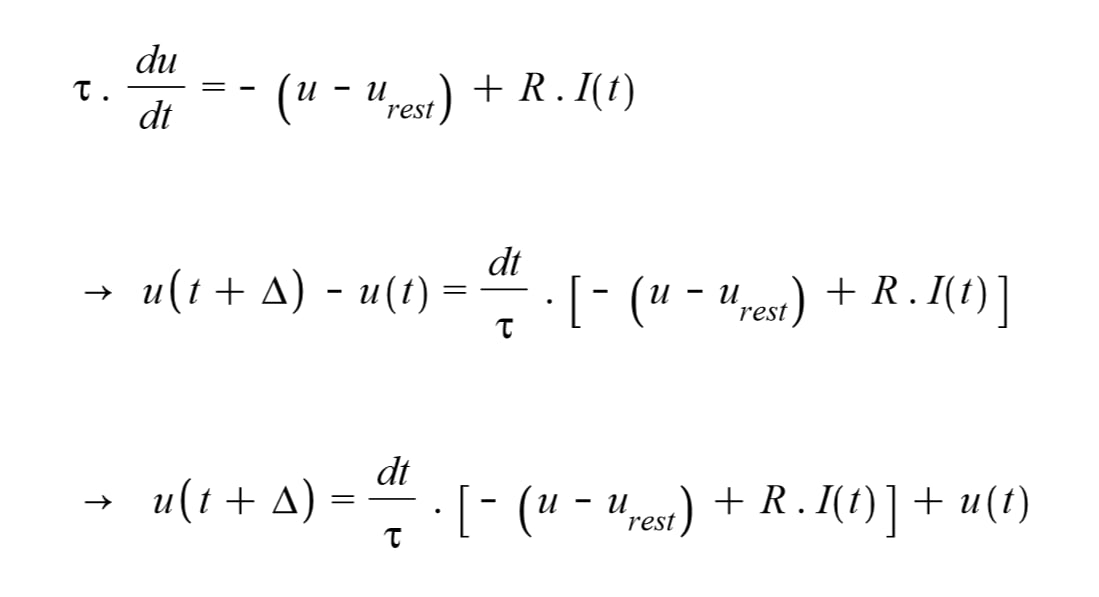

In [5]:
class LIF:
    def __init__(self, time=100, dt=0.125, i_function=I_Interval, u_rest=0, r=1, c=10, threshold=2):
        self.time = time
        self.dt = dt
        self.i_function = i_function
        self.u_rest = u_rest
        self.r = r
        self.c = c
        self.threshold = threshold
        self.u = []
        self.init_u()
        
    def spike_time(self, i):
        timer = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        u = [self.u_rest for i in range(len(timer))]
        i_input = [I_Constant(j, i=i) for j in timer]
        spike_t = self.time
        current_spike_time = 0
        for j in range(len(timer)):
            u[j] = u[j - 1] + ((self.r * i_input[j] - (u[j - 1] - self.u_rest)) / time_const) * self.dt
            if u[j] >= self.threshold:
                u[j] = self.u_rest
                prev_spike_time = current_spike_time
                current_spike_time = timer[j]
                spike_t = min(spike_t, current_spike_time - prev_spike_time)
                
        return spike_t

    def init_u(self):
        timer = np.arange(0, self.time + self.dt, self.dt)
        time_const = self.r * self.c
        u = [self.u_rest for i in range(len(timer))]
        i_input = [self.i_function(j) for j in timer]
        
        for j in range(len(timer)):
            u[j] = u[j - 1] + ((self.r * i_input[j] - (u[j - 1] - self.u_rest)) / time_const) * self.dt
            if u[j] >= self.threshold:
                u[j] = self.u_rest
                
        self.u = u

    def plot(self, u_t=False, i_t=False, f_i=False):
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle('LIF MODEL\n\n' +
                     "R: " + str(self.r) +
                     "    C: " + str(self.c) +
                     "    I: " + (str(self.i_function.__doc__).strip()) +
                     "    THRESHOLD: " + str(self.threshold), fontsize=14, fontweight='bold')
        
        timer = np.arange(0, self.time + self.dt, self.dt)
        i_input = [self.i_function(j) for j in timer]
        
        if u_t:
            subplot(221)
            plot(timer, self.u)
            ylabel('U')
            xlabel('Time')
            title('U - Time plot')
            grid(True)
                
        if i_t:
            subplot(221)
            plot(timer, i_input)
            ylabel('I')
            xlabel('Time')
            title('I - Time plot')
            grid(True)
            
        if f_i:
            time_const = self.r * self.c
            i_x = np.arange(0, max(i_input), self.dt)
            i_y = [0 for _ in range(len(i_x))]
            
            for j in range(len(i_x)):
                try:
                    i_y[j] = 1 / (self.spike_time(i=i_x[j]))
                except:
                    i_y[j] = 0
            subplot(221)
            plot(i_x, i_y)
            ylabel('F')
            xlabel('I')
            title('F - I plot')
            grid(True)

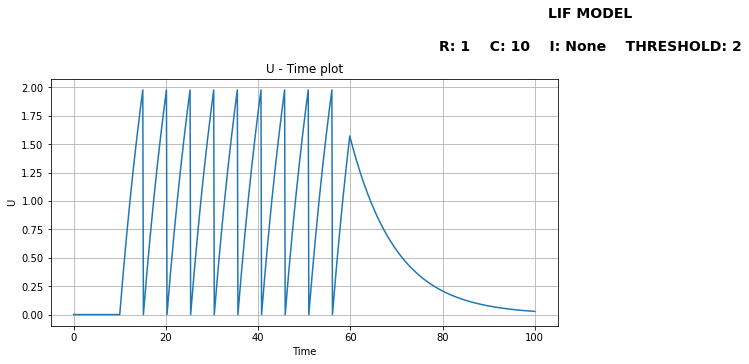

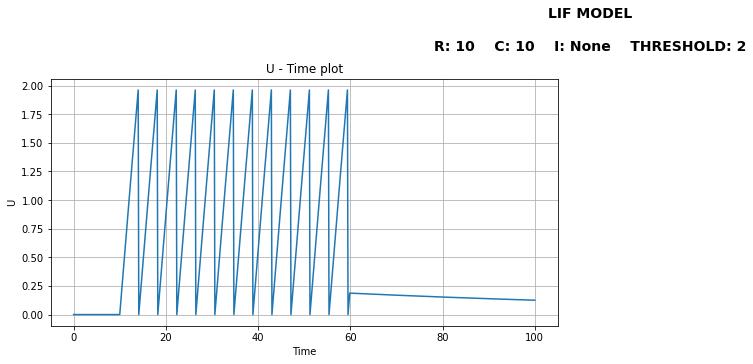

In [6]:
# Resistance change Effects
lif = LIF(r=1)
lif.plot(u_t=True)
lif = LIF(r=10)
lif.plot(u_t=True)

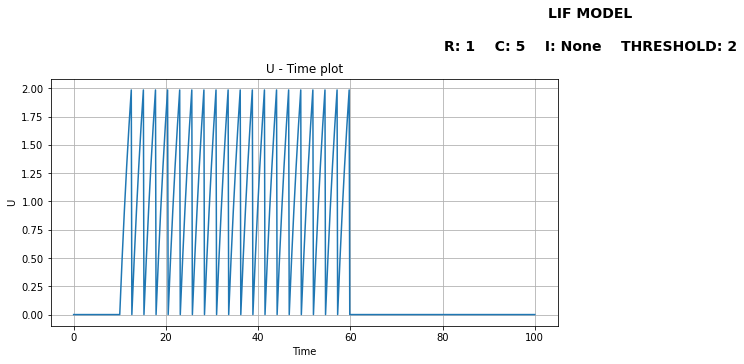

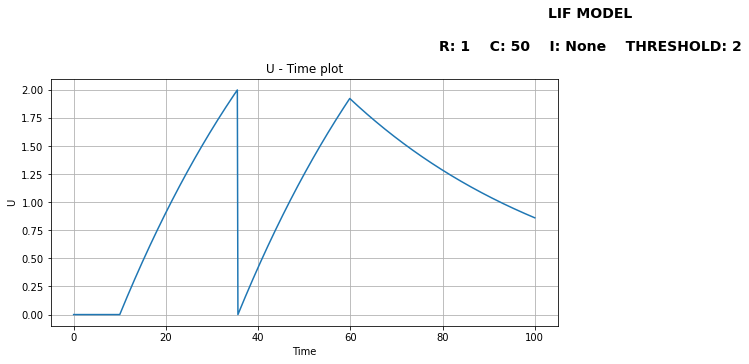

In [7]:
#capacity change effect
lif = LIF(c=5)
lif.plot(u_t=True)
lif = LIF(c=50)
lif.plot(u_t=True)

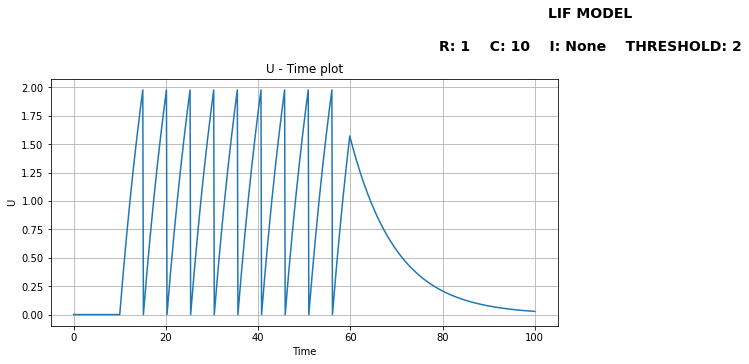

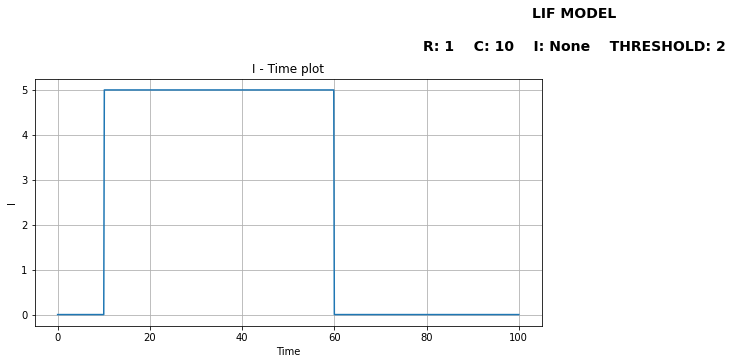

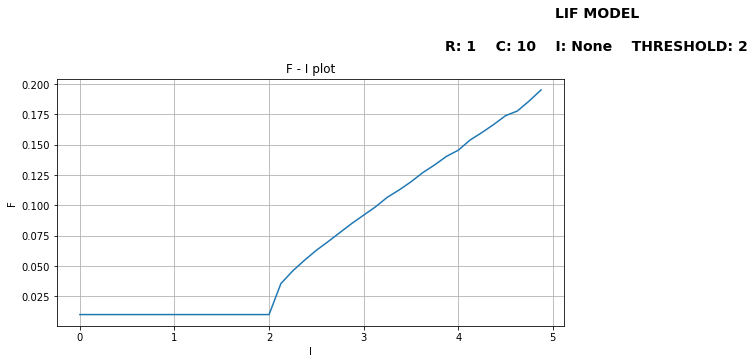

In [15]:
#differect current functions
lif = LIF(i_function=I_Interval)
lif.plot(u_t=True)
lif.plot(i_t=True)
lif.plot(f_i=True)

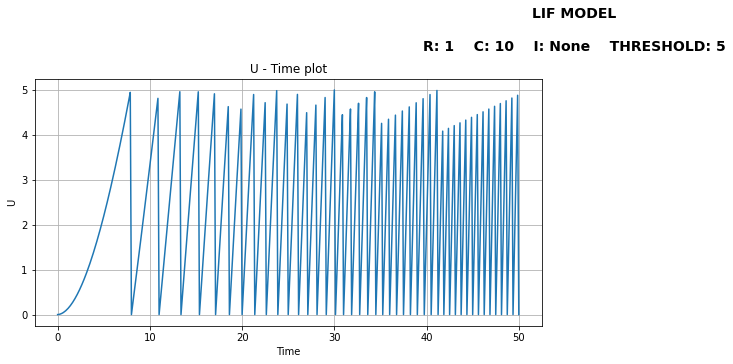

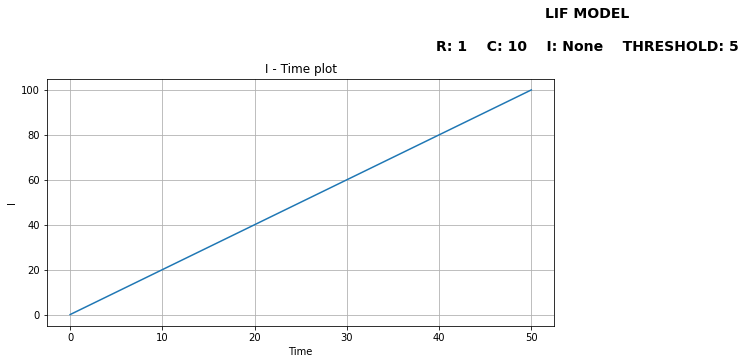

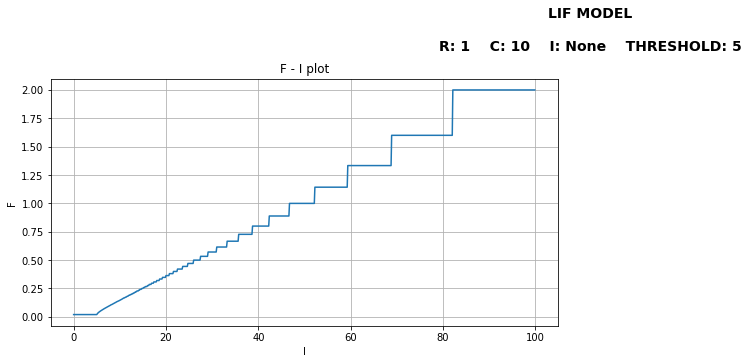

In [10]:
lif = LIF(time=50, i_function=I_Linear, threshold=5)
lif.plot(u_t=True)
lif.plot(i_t=True)
lif.plot(f_i=True)

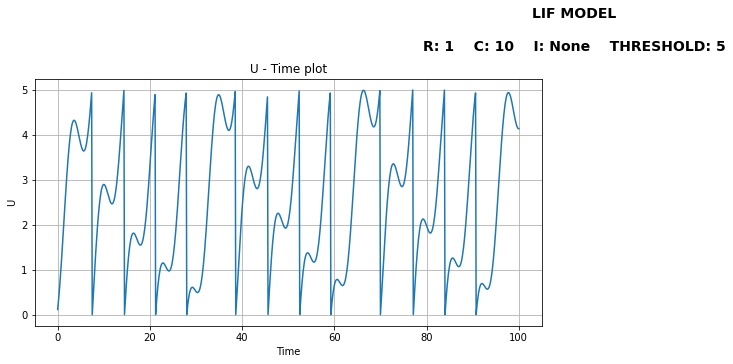

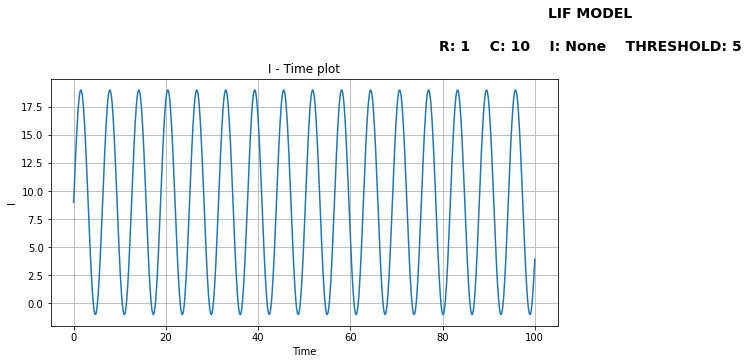

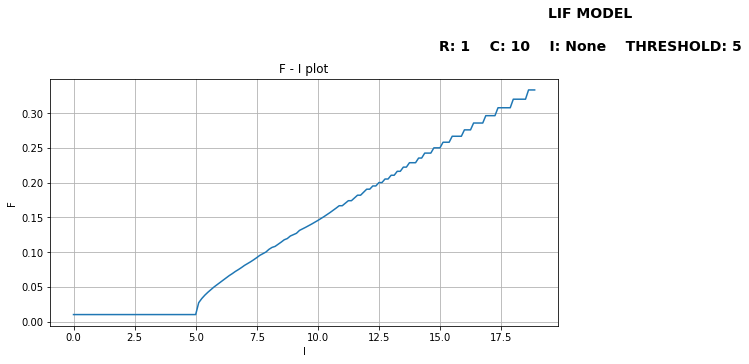

In [12]:
lif = LIF(i_function=I_Sine, threshold=5)
lif.plot(u_t=True)
lif.plot(i_t=True)
lif.plot(f_i=True)

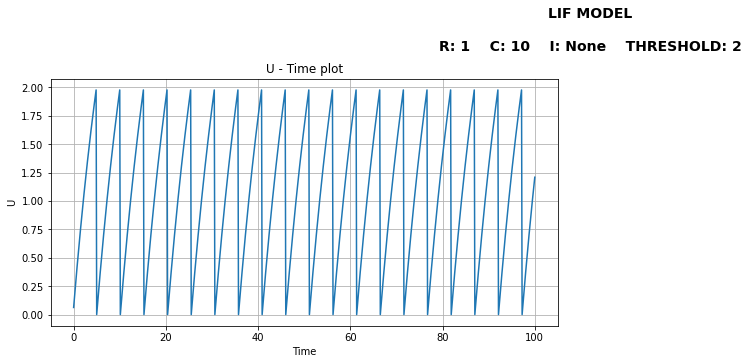

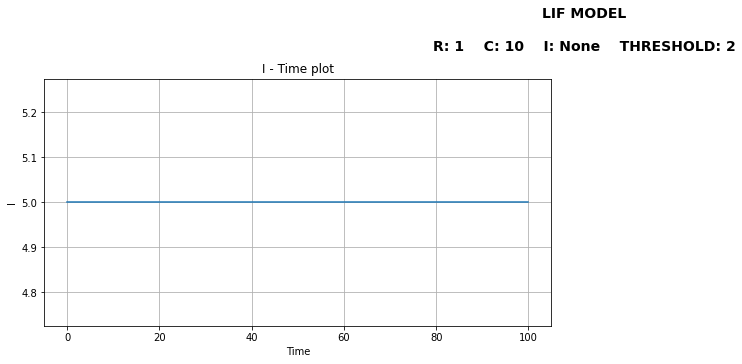

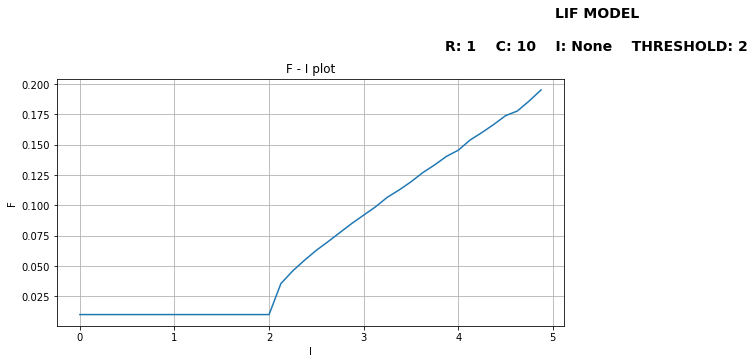

In [13]:
lif = LIF(i_function=I_Constant)
lif.plot(u_t=True)
lif.plot(i_t=True)
lif.plot(f_i=True)

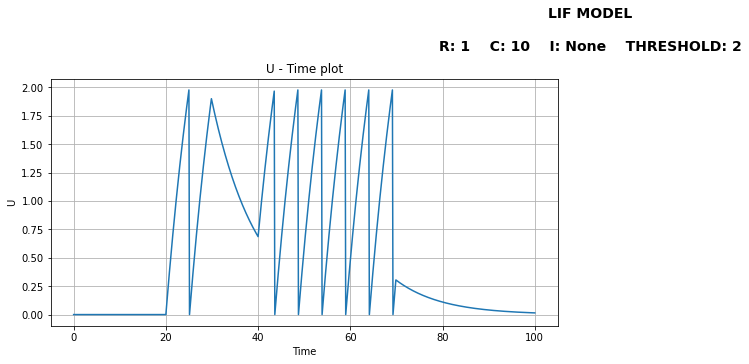

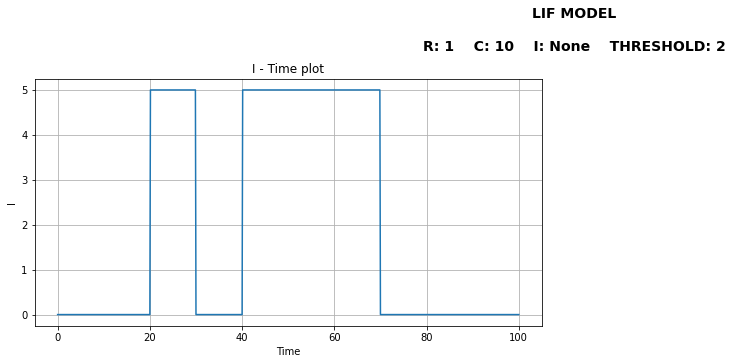

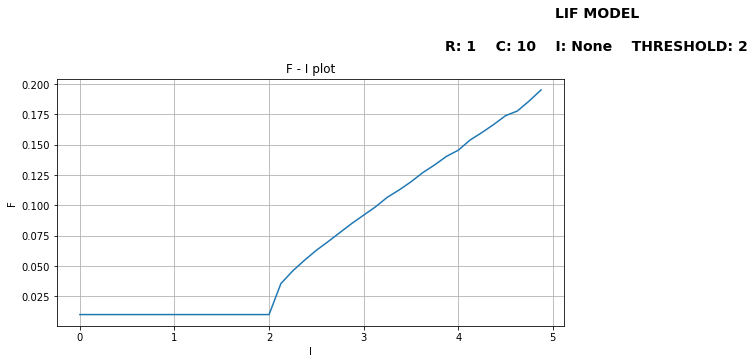

In [14]:
lif = LIF(i_function=I_Step)
lif.plot(u_t=True)
lif.plot(i_t=True)
lif.plot(f_i=True)